In [166]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud


from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [167]:
df = pd.read_csv(r"C:\Users\User\Desktop\Bootfile\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [169]:
df.shape

(301, 9)

In [170]:
nans =  pd.Series(df.isna().sum())
print("nans shape:", nans.shape)
nans.head(10)

nans shape: (9,)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [171]:
df.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

In [172]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


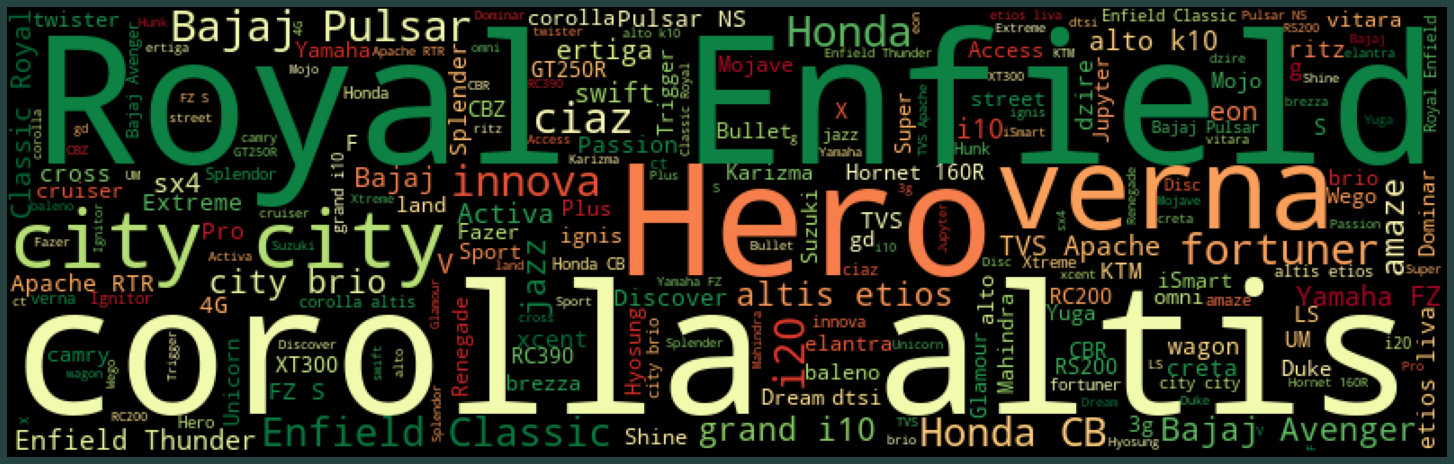

In [173]:
text = ",".join(Name for Name in df["Car_Name"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

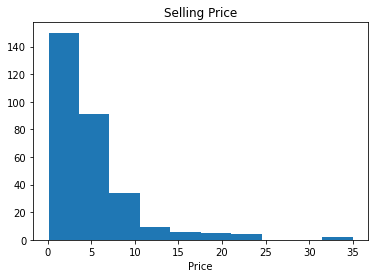

In [174]:
plt.hist(df["Selling_Price"])
plt.xlabel("Price")
plt.title("Selling Price");

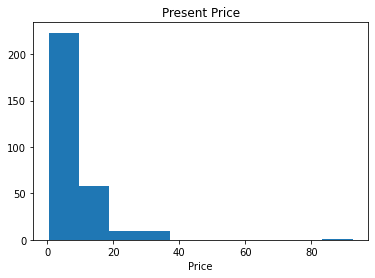

In [175]:
plt.hist(df["Present_Price"])
plt.xlabel("Price")
plt.title("Present Price");

In [176]:
df.describe()["Selling_Price"]

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [177]:
df.describe()["Present_Price"]

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

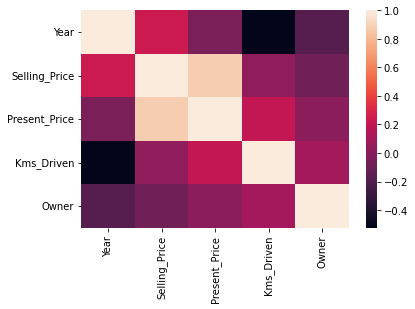

In [178]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr);

# Split Data

In [179]:
features = ["Present_Price","Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]
X = df[features]
print(X.shape)
X.head()

(301, 6)


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.59,27000,Petrol,Dealer,Manual,0
1,9.54,43000,Diesel,Dealer,Manual,0
2,9.85,6900,Petrol,Dealer,Manual,0
3,4.15,5200,Petrol,Dealer,Manual,0
4,6.87,42450,Diesel,Dealer,Manual,0


In [180]:
assert X.shape == (301, 6), f"`X_train` is the wrong size: {X.shape}."

In [181]:
target = "Selling_Price"
y = df[target]
print(y.shape)
y.head()

(301,)


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [182]:
assert y.shape == (301,), f"`y_train` is the wrong size: {y.shape}."

# Build Model

# Baseline

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 6)
y_train shape: (240,)
X_test shape: (61, 6)
y_test shape: (61,)


In [184]:
y_mean = y_train.mean()
y_pred_baseline =  [y_mean] * len(y_train)
mae_baseline =  mean_absolute_error(y_train, y_pred_baseline)

print("Mean Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Reading: 4.64
Baseline MAE: 3.45


In [185]:
# Build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Fuel_Type', 'Seller_Type',
                                     'Transmission'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [186]:
# Check your work
check_is_fitted(model[-1])

In [187]:
model_predict =model.predict(X_train)

In [188]:
model_predictX=model.predict(X_test)

In [189]:
training_mae = mean_absolute_error(y_train, model_predict)
test_mae = mean_absolute_error(y_test, model_predictX)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 1.23
Test MAE: 1.45


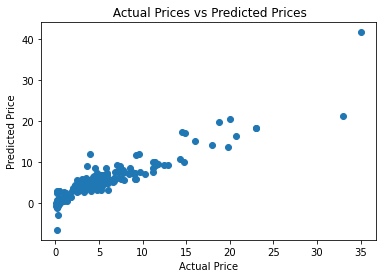

In [190]:
plt.scatter(y_train, model_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

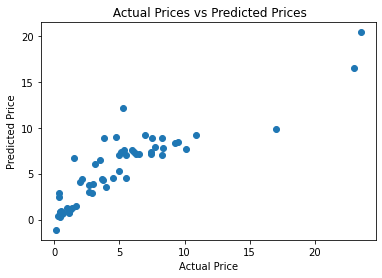

In [191]:
plt.scatter(y_test, model_predictX)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Communicate Results

In [193]:
intercept = model.named_steps["linearregression"].intercept_.round()
coefficients = model.named_steps["linearregression"].coef_.round()
print(intercept, coefficients)

3.0 [ 0. -0. -0.  2. -1. -1.  1. -1.  1. -1.]


In [194]:
# Build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

In [195]:
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Fuel_Type', 'Seller_Type',
                                     'Transmission'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [196]:
# Check your work
check_is_fitted(model[-1])

In [197]:
y_mean = y_train.mean()
y_pred_baseline =  [y_mean] * len(y_train)
mae_baseline =  mean_absolute_error(y_train, y_pred_baseline)

print("Mean Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Reading: 4.64
Baseline MAE: 3.45


In [198]:
model_p =model.predict(X_train)

In [199]:
model_pX=model.predict(X_test)

In [200]:
training_mae = mean_absolute_error(y_train, model_p)
test_mae = mean_absolute_error(y_test, model_pX)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 1.23
Test MAE: 1.45


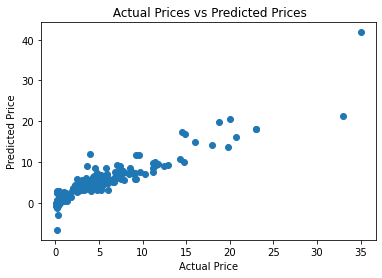

In [201]:
plt.scatter(y_train,model_p)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

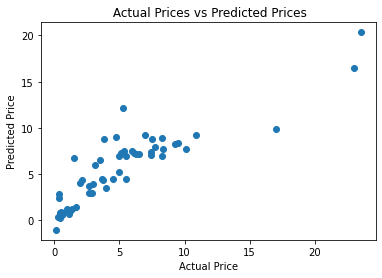

In [202]:
plt.scatter(y_test,model_pX)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [203]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test,
        "y_pred" : model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred
177,0.35,2.398367
289,10.11,7.692605
228,4.95,6.978431
198,0.15,-1.044496
60,6.95,9.261499


In [204]:
fig = px.line(df_pred_test , labels = {"value" : "Selling-prediction"} )
fig.show()

In [205]:
df_pred_train = pd.DataFrame(
    {
        "y_train" : y_train,
        "y_pred" : model.predict(X_train)
    }
)
df_pred_test.head()

,y_test,y_pred
177,0.35,2.398367
289,10.11,7.692605
228,4.95,6.978431
198,0.15,-1.044496
60,6.95,9.261499


In [206]:
fig = px.line(df_pred_train , labels = {"value" : "Selling-Prediction"} )
fig.show()

# Communicate Results

In [207]:
intercept = model.named_steps["ridge"].intercept_.round()
coefficients =  model.named_steps["ridge"].coef_.round()
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 10
[ 0. -0. -1.  1. -1.]
